## 30 seconds

In [3]:
sum(trainLabel)

array([ 452.,  150., 2980., 1496.])

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)


In [5]:
cw = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)
print(cw)

[2.80862832 8.46333333 0.42600671 0.84859626]


In [7]:
a = np.array([ 452.,  150., 2980., 1496.])
b = np.array([2.80862832, 8.46333333, 0.42600671, 0.84859626])
print(a*b)

[1269.50000064 1269.4999995  1269.4999958  1269.50000496]


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from toolkit import normalization
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = normalization.normalize_arr(trainD, trace=True)
validationD = normalization.normalize_arr(validationD, trace=True)
testD = normalization.normalize_arr(testD, trace=True)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

cw = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Problematic data index:  [13, 37, 81, 124, 184, 187, 188, 399, 408, 463, 481, 485, 487, 488, 490, 497, 499, 503, 531, 532, 536, 539, 541, 542, 552, 559, 560, 589, 591, 592, 593, 617, 732, 817, 934, 1037, 1209, 1265, 1307, 1367, 1416, 1437, 1447, 1603, 1604, 1618, 1644, 1645, 1667, 1848, 1868, 1881, 1891, 1899, 1980, 1981, 1987, 2053, 2221, 2330, 2352, 2368, 2388, 2423, 2476, 2502, 2654, 2676, 2792, 2799, 2819, 2878, 2941, 2972, 3021, 3116, 3303, 3401, 3412, 3617, 3631, 3669, 3699, 3734, 3885, 3899, 3903, 3949, 3974, 4033, 4077, 4129, 4285, 4373, 4719, 4733, 4958, 4960, 4980, 5029, 5068]
Normalization done!
Problematic data index:  [185, 189, 190, 196, 199, 221, 222, 230, 236, 252, 348, 383, 460, 466, 467, 618, 619, 768, 769, 791, 904, 915, 982, 989, 1053, 1075, 1139, 1179, 1182, 1215, 1223, 1244, 1252, 1371, 1712, 1713, 1803, 1804, 1834, 1925, 1926, 1997, 1998, 2021]
Normalization done!
Problematic data index:  [87, 146, 196, 279, 291, 295, 304, 307, 314, 316, 322, 336, 340, 351, 355, 

In [2]:
try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")

model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

adam = Adam(lr = 0.0005)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

cw = {0: cw[0],
      1: cw[1],
      2: cw[2],
      3: cw[3]}

early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=150,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            class_weight=cw,
                            batch_size=70, 
                            verbose=1)

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0        

5078/5078 [==============================] - 4s 757us/step - loss: 0.9040 - acc: 0.4986 - val_loss: 1.0328 - val_acc: 0.5743
Epoch 19/150
5078/5078 [==============================] - 4s 804us/step - loss: 0.8743 - acc: 0.5272 - val_loss: 1.0202 - val_acc: 0.5664
Epoch 20/150
5078/5078 [==============================] - 4s 796us/step - loss: 0.8362 - acc: 0.5581 - val_loss: 0.8924 - val_acc: 0.6324
Epoch 21/150
5078/5078 [==============================] - 4s 790us/step - loss: 0.8269 - acc: 0.5545 - val_loss: 1.0315 - val_acc: 0.5684
Epoch 22/150
5078/5078 [==============================] - 4s 783us/step - loss: 0.8236 - acc: 0.5658 - val_loss: 0.8448 - val_acc: 0.6437
Epoch 23/150
5078/5078 [==============================] - 4s 752us/step - loss: 0.8075 - acc: 0.5705 - val_loss: 0.8521 - val_acc: 0.6289
Epoch 24/150
5078/5078 [==============================] - 4s 748us/step - loss: 0.8419 - acc: 0.5364 - val_loss: 1.0105 - val_acc: 0.5802
Epoch 25/150
5078/5078 [=======================

5078/5078 [==============================] - 4s 750us/step - loss: 0.4486 - acc: 0.7584 - val_loss: 0.7397 - val_acc: 0.7195
Epoch 78/150
5078/5078 [==============================] - 4s 801us/step - loss: 0.4340 - acc: 0.7588 - val_loss: 0.6420 - val_acc: 0.7530
Epoch 79/150
5078/5078 [==============================] - 4s 770us/step - loss: 0.4091 - acc: 0.7735 - val_loss: 0.7209 - val_acc: 0.7352
Epoch 80/150
5078/5078 [==============================] - 4s 791us/step - loss: 0.3983 - acc: 0.7824 - val_loss: 0.6487 - val_acc: 0.7530
Epoch 81/150
5078/5078 [==============================] - 4s 748us/step - loss: 0.3882 - acc: 0.7838 - val_loss: 0.7158 - val_acc: 0.7392
Epoch 82/150
5078/5078 [==============================] - 4s 746us/step - loss: 0.4027 - acc: 0.7838 - val_loss: 0.7531 - val_acc: 0.7224
Epoch 83/150
5078/5078 [==============================] - 4s 762us/step - loss: 0.4091 - acc: 0.7761 - val_loss: 0.7089 - val_acc: 0.7283
Epoch 84/150
5078/5078 [=======================

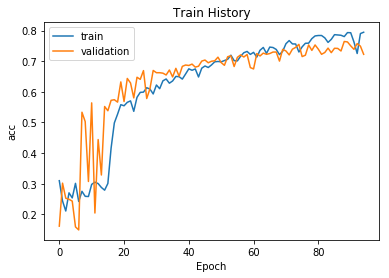

In [3]:
show_plot('acc', train_history_1)

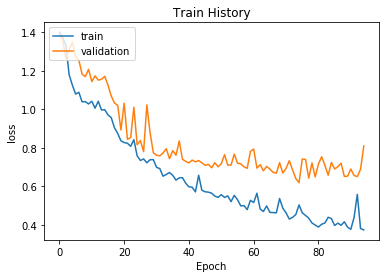

In [4]:
show_plot('loss', train_history_1)

Confusion matrix, without normalization


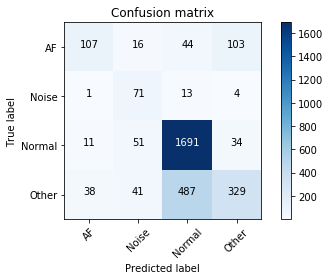

In [5]:
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=False)